# **MISE EN SITUATION**

**Web Scraping: Méthodes, Limites et Considérations Légales**

Le web scraping, ou extraction de données web, est une technique automatisée qui consiste à extraire des données à partir de sites web. Cette méthode est devenue un outil essentiel pour les chercheurs, les analystes de données et les entreprises qui ont besoin de collecter de grandes quantités d'informations disponibles publiquement sur internet.



**Limitations et défis du Web Scraping :**

- **Structure du site web** : La structure d'un site web peut changer sans préavis, ce qui peut rendre un script de web scraping obsolète. Il est important de surveiller régulièrement le site cible et de mettre à jour le script au besoin.

- **Sites dynamiques** : Si le site web utilise JavaScript pour charger du contenu dynamiquement, l'extraction de données peut être plus difficile et nécessiter l'utilisation d'outils supplémentaires comme `Selenium`.

- **Respect des robots.txt :** Les sites web peuvent avoir des fichiers robots.txt qui indiquent quelles parties du site peuvent être explorées ou non par les robots. Il est important de respecter ces directives.

- **Blocage par le serveur :** Si un script de web scraping effectue des requêtes trop rapidement ou en trop grand nombre, le serveur du site web peut bloquer l'accès à l'adresse IP du client. Il est donc important d'être respectueux et d'appliquer des délais raisonnables entre les requêtes.

- **Manque de données:** Les données extraites peuvent être manquantes ou incomplètes, cela impactera la qualité de l'analyse.

**Méthode et outils utilisés :**

Dans ce projet, nous avons utilisé les outils et la méthode suivants pour extraire des informations sur les annonces voiture du site web "Coin Afrique" et pour analyser les données collectées:

- **Langage de programmation :** Python, un langage polyvalent très utilisé en data science et en web scraping.
Bibliothèque de requête HTTP : requests pour envoyer des requêtes HTTP au serveur du site web et télécharger le code HTML des pages.

- **Bibliothèque d'analyse HTML :** Beautiful Soup 4 (bs4), une bibliothèque Python qui permet d'analyser le code HTML et XML. Elle facilite la navigation dans l'arbre HTML et l'extraction des données souhaitées.

- **Bibliothèque de manipulation de données :** pandas pour structurer les données extraites dans un DataFrame, facilitant ainsi l'analyse et la manipulation.

- **Bibliothèque de calcul numérique :** numpy pour effectuer des opérations mathématiques et statistiques sur les données, ainsi que pour manipuler les tableaux de données de manière efficace.

- **Bibliothèque de visualisation de données :** matplotlib.pyplot pour créer des graphiques statiques de base, comme des histogrammes, des nuages de points et des diagrammes en barres.

- **Bibliothèque de visualisation statistique :** seaborn pour créer des graphiques statistiques avancés, tels que des heatmaps, des boxplots et des distributions, facilitant l'exploration et la compréhension des relations entre les variables.

- **Manipulation des données :** Utilisation des méthodes de pandas pour nettoyer et transformer les données (e.g., extraction des textes, suppression des espaces inutiles).

- **Gestion du rythme des requêtes :** Utilisation de la fonction time.sleep() pour respecter le serveur et éviter de le surcharger en faisant des requêtes à un rythme trop élevé.

# **RECUPERATION DES DONNEES**

In [47]:
#importation des bibliothèques
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#création de la fonction get_car
def get_cars():
    headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:135.0) Gecko/20100101 Firefox/135.0"} # le pass pour pouvoir collecter les données
    base_url = "https://ci.coinafrique.com/search?sort_by=last&category=45&page=" # url pourobtenir les données
    all_data = [] # initialisation d'une lise vide pour collecter les données scrappés
    initial_page = 1
    max_pages = 20  # Limite à 20 pages

    # boucle pour parcourir les différentes pages
    while initial_page <= max_pages:
        url = base_url + str(initial_page)
        print(f"Scraping page {initial_page} effectué")
        r = requests.get(url, headers=headers)
        if r.status_code != 200:
            print(f"Error: Received status code {r.status_code} on page {initial_page}. Stopping.")
            break

        # récuppérer les données obtenues
        result = BeautifulSoup(r.text, 'html.parser')
        annonces = result.find_all('div', class_='col s6 m4 l3')

        if not annonces:
            print("donneés non trouvé.")
            break

        # déclaration des variables (valeurs = None) pour toutes les lignes vides
        for annonce in annonces:
            type_transaction = None
            prix_location = None
            devise_location = None
            prix_vente = None
            description = None
            localisation = None

            # accès à la balise qui contient les données ciblées
            card = annonce.find('div', class_='monthly-payment-card')
            if card:
                # récuppération des données du type de transaction, le prix des locations, et la devise de locations
                type_transaction = card.find('p', class_='monthly-payment-begin-from').text.strip() if card.find('p', class_='monthly-payment-begin-from') else None
                prix_location = card.find('span', class_='monthly-payment-price').text.strip() if card.find('span', class_='monthly-payment-price') else None
                devise_location = card.find('span', class_='monthly-payment-currency').text.strip() if card.find('span', class_='monthly-payment-currency') else None

            # récuppération du prix de vente
            prix_vente = annonce.find('p', class_='ad__card-price')
            if prix_vente:
                prix_vente = prix_vente.text.strip() if prix_vente else None

            # récupération de la descrition
            description = annonce.find('p', class_='ad__card-description')
            if description:
                description = description.find('a').get('title') if description.find('a') else None

            # récuppération de la localisation
            localisation = annonce.find('p', class_='ad__card-location').find('span').text.strip() if annonce.find('p', class_='ad__card-location') else None

             # stocker les données collectés dans la liste all_data
            all_data.append({
                'type_transaction': type_transaction,
                'prix_location': prix_location,
                'devise_location': devise_location,
                'prix_vente': prix_vente,
                'description': description,
                'localisation': localisation
            })

    #     # initialisation de la page de début ainsi que le temps d'attente avant de scrapper à nouveau une autre page
        initial_page += 1
        time.sleep(2)

    # #convertir les données collectées en dataframe pour une analyse
    df = pd.DataFrame(all_data)
    df.to_csv('cars.csv', index=False) # télécharger les données collectées au format csv (optionnel)
    return df

get_cars() #appel de la fonction

Scraping page 1 effectué
Scraping page 2 effectué
Scraping page 3 effectué
Scraping page 4 effectué
Scraping page 5 effectué
Scraping page 6 effectué
Scraping page 7 effectué
Scraping page 8 effectué
Scraping page 9 effectué
Scraping page 10 effectué
Scraping page 11 effectué
Scraping page 12 effectué
Scraping page 13 effectué
Scraping page 14 effectué
Scraping page 15 effectué
Scraping page 16 effectué
Scraping page 17 effectué
Scraping page 18 effectué
Scraping page 19 effectué
Scraping page 20 effectué


,type_transaction,prix_location,devise_location,prix_vente,description,localisation
0,None,None,None,45 000 000CFA,Mercedes-benz g 2016,"Cocody, Abidjan, Côte d'Ivoire"
1,None,None,None,9 850 000CFA,Hyundai Santa fe 2018,"Cocody, Abidjan, Côte d'Ivoire"
2,None,None,None,2 350 000CFA,Volkswagen Golf 2005,"Cocody, Abidjan, Côte d'Ivoire"
3,A partir de,904 990,CFA/mois *,18 500 000CFA,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire"
4,A partir de,1 283 739,CFA/mois *,26 800 000CFA,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire"
...,...,...,...,...,...,...
1675,None,None,None,5 800 000CFA,Hyundai Santa Fe 2008,"Cocody, Abidjan, Côte d'Ivoire"
1676,A partir de,859 358,CFA/mois *,17 500 000CFA,Toyota Rav4 2020,"Cocody, Abidjan, Côte d'Ivoire"
1677,A partir de,603 817,CFA/mois *,11 900 000CFA,Volkswagen Passat 2021,"Cocody, Abidjan, Côte d'Ivoire"
1678,None,None,None,10 500 000CFA,Kia Sorento 2017,"Cocody, Abidjan, Côte d'Ivoire"


# **DESCRIPTION ET OBJECTIFS**

### **Description des données**

Le jeu de données  collecté contient des informations sur les annonces de voitures trouvées sur le site "Coin Afrique". Chaque ligne du jeu de données représente une annonce unique et comprend les colonnes suivantes :

- **type_transaction :** Indique si l'annonce est pour une location ("A partir de ") ou une vente. Si l'annonce est une vente, ce champ est None.

- **prix_location :** Le prix de location mensuel affiché dans l'annonce (s'il y en a un), sinon None.

- **devise_location :** La devise utilisée pour le prix de location mensuel (s'il y en a un), sinon None.

- **prix_vente :** Le prix de vente.

- **description :** Une brève description de l'annonce, généralement le modèle de la voiture.

- **location :** La ville et le pays où la voiture est mise en vente ou en location.

Ce jeu de données vous permet d'analyser les tendances du marché des voitures, en comparant les prix de vente et de location, en identifiant les zones géographiques où les offres sont concentrées, et en observant la description des annonces.

### **Objectifs**

Voici quelques objectifs d'analyse que nous pouvons explorer avec ce jeu de données :

 **Répartition des types d'annonces :**

1. Quel est le pourcentage d'annonces de location par rapport aux annonces de vente?
2. Y a-t-il des différences de prix significatives entre les annonces de location et de vente ?

**Analyse des prix de vente :**

1. Quelle est la distribution des prix de vente par marque ?
2. Quels sont les prix moyens, médians, maximum et minimum des voitures ?
3. Y a-t-il des variations de prix en fonction de la localisation ?

**Analyse des prix de location :**

1. Quels sont les prix moyens de location des voitures ?
2. Y a t'il une correlation entre le prix de vente et le prix de location ?

**Répartition géographique des annonces :**

1. Quelles sont les villes où l'on trouve le plus d'annonces ?
2. Y a-t-il des zones où les prix sont plus élevés ou plus bas ?

**Analyse descriptive des annonces :**

1. Quelles sont les descriptions les plus fréquentes?
Y a-t-il des mots clés dans la description qui indiquent un état particulier (neuf, occasion, etc.) ?

# **ANALYSE EXPLORATOIRE DES DONNEES**

In [48]:
# chargement des données
df = pd.read_csv('cars.csv')
df.head()

,type_transaction,prix_location,devise_location,prix_vente,description,localisation
0,A partir de,904 990,CFA/mois *,18 500 000CFA,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire"
1,A partir de,1 283 739,CFA/mois *,26 800 000CFA,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire"
2,NaN,NaN,NaN,6 300 000CFA,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire"
3,NaN,NaN,NaN,2 500 000CFA,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire"
4,NaN,NaN,NaN,16 800 000CFA,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire"


Nos données contiennent des valeurs null(Nan), essayons de comprendre la cause

In [49]:
#copy de df pour voir les données null
df_null = df[df.isnull().any(axis=1)]
df_null.head(10)

,type_transaction,prix_location,devise_location,prix_vente,description,localisation
2,NaN,NaN,NaN,6 300 000CFA,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire"
3,NaN,NaN,NaN,2 500 000CFA,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire"
4,NaN,NaN,NaN,16 800 000CFA,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire"
5,NaN,NaN,NaN,10 900 000CFA,Mercedes-benz C 2016,"Cocody, Abidjan, Côte d'Ivoire"
6,NaN,NaN,NaN,10 800 000CFA,Mercedes-benz C300 2017,"Cocody, Abidjan, Côte d'Ivoire"
7,NaN,NaN,NaN,4 500 000CFA,Mercedes-Benz ML 2005,"Cocody, Abidjan, Côte d'Ivoire"
11,NaN,NaN,NaN,45 000 000CFA,Toyota Land Cruiser 2019,"Angré, Abidjan, Côte d'Ivoire"
12,NaN,NaN,NaN,5 500 000CFA,Nissan Juke 2011,"Cocody, Abidjan, Côte d'Ivoire"
13,NaN,NaN,NaN,6 500 000CFA,BMW X6 2008,"Yopougon, Abidjan, Côte d'Ivoire"
16,NaN,NaN,NaN,11 500 000CFA,Mercedes-Benz GLA 250 4Matic 2017,"Cocody, Abidjan, Côte d'Ivoire"


Lors de la récupération des données, nous avons définis une condition qui récupère la valeur null lorsque le chanp à récuppérer était vide, ce qui explique ses valeurs vides.

In [50]:
# description de l'enssemble des données
df.describe(include='all')

,type_transaction,prix_location,devise_location,prix_vente,description,localisation
count,735,735,735,1680,1680,1680
unique,1,218,1,302,1183,10
top,A partir de,1 657 925,CFA/mois *,10 800 000CFA,Hyundai Tucson 2020,"Cocody, Abidjan, Côte d'Ivoire"
freq,735,19,735,29,14,1041


In [51]:
#totaliser les lignes et colones
df.shape

(1680, 6)

Nous avons 1680 lignes et 6 colones

In [52]:
# afficher le type de données de toutes les colones
df.dtypes

,0
type_transaction,object
prix_location,object
devise_location,object
prix_vente,object
description,object
localisation,object


- `prix_location` est de type "object", ce qui est à corriger
- `prix_vente` est de type "object", ce qui est à corriger

### **Analye sur les variables**

##### Analyse sur la `localisation`


In [53]:
#aperçu
df.localisation.head(10)

,localisation
0,"Cocody, Abidjan, Côte d'Ivoire"
1,"Cocody, Abidjan, Côte d'Ivoire"
2,"Cocody, Abidjan, Côte d'Ivoire"
3,"Cocody, Abidjan, Côte d'Ivoire"
4,"Cocody, Abidjan, Côte d'Ivoire"
5,"Cocody, Abidjan, Côte d'Ivoire"
6,"Cocody, Abidjan, Côte d'Ivoire"
7,"Cocody, Abidjan, Côte d'Ivoire"
8,"Cocody, Abidjan, Côte d'Ivoire"
9,"Cocody, Abidjan, Côte d'Ivoire"


In [54]:
#nombre de valeur unique
df.localisation.nunique()

10

Nous avons 11 localisations qui se répète.

**NB**:  toutes les annonces sont en Côte d'Ivoire, donc nous allons nous focaliser sur la ville et la commune si possible

Nous allons extraire la `ville` et `commune`

##### Analyse sur le `prix_vente


cette variable qui devrait être de type `int` est de type `object` donc impossible à ce niveau d'aller plus loin.

Une vérificaton sera faite plus tard lors du nettoyage :
- vérifier q'aucune valeur n'est inférieur à 0
- voir le prix max et min de vente

le `prix_vente` contient les dévises, qui doivent être extraite et ignorer si la devise est le CFA

##### Analyse sur la `devise_location`

In [55]:
#dévises de location
df.devise_location.unique()

array(['CFA/mois *', nan], dtype=object)

- les valeurs null sont ceux pour lesquelles le type_transaction est vente
- la seule devise est le CFA (qui sera utilisé comme dévise générale)
- On peut alors supposer que toutes les devises de cette colones sont le CFA donc cette colone n'a plus d'importance

##### Analyse sur le `prix_location`

cette variable qui devrait être de type `int` est de type `object` donc impossible à ce niveau d'aller plus loin.

Une vérificaton sera faite plus tard lors du nettoyage :
- vérifier q'aucune valeur n'est inférieur à 0
- voir le prix max de location

##### Analyse sur le `type_transaction`

In [56]:
#nombre de valeur y compris les valeurs nulls
df.type_transaction.value_counts(dropna=False)

,count
type_transaction,
NaN,945
A partir de,735


- remplacer les valeurs null par vente et "A partir de" par *location*

##### Analyse sur la `description`


In [57]:
#contenu
df.description.head(10)


,description
0,Mitsubishi Pajero GLS 2020
1,Hyundai Santa fe 2023
2,Kia Sportage LX phase 2 2010
3,Ford Focus 2005
4,Toyota Rav4 2019
5,Mercedes-benz C 2016
6,Mercedes-benz C300 2017
7,Mercedes-Benz ML 2005
8,Suzuki Fronx 2024
9,Fiat fullback double cabine 2022


cette colonne contient des données exploitable, il serait intéressant d'extraire : la `marque`, le `modele`, l'`annee`

# **NETTOYAGE DES DONNEES**

### Correction à faire

**Qualité des données :**
1. Résoudre les problèmes liés aux valueurs null.
2. remplacer les valeurs null par vente et "A partir de" par location sur la colone `type_location`


**Type de données :**
1.  `prix_location` est de type "object", ce qui est à corriger
2. `prix_vente` est de type "object", ce qui est à corriger

**Autres** :
1. Exclure la colone `devise_location`

### Enrichissement des données

- **A partir de la variable `description`, extraire :**
1. la `marque`
2. le `modele`
3. l'`annee

**A partir de la variable `localisation`, extraire :**
1. la `ville`
2. la `commune`

**A partir de la variable `prix_vente`, extraire :**
1. la `devise_vente`



### Mise en oeuvre du nettoyage

In [58]:
#copy de df pour le nettoyage
df_clean = df.copy()

#accorder le type de transaction
df_clean['type_transaction'] = df_clean['type_transaction'].fillna('Vente')
df_clean['type_transaction'] = df_clean['type_transaction'].replace('A partir de', 'Location')
df_clean.head()

,type_transaction,prix_location,devise_location,prix_vente,description,localisation
0,Location,904 990,CFA/mois *,18 500 000CFA,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire"
1,Location,1 283 739,CFA/mois *,26 800 000CFA,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire"
2,Vente,NaN,NaN,6 300 000CFA,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire"
3,Vente,NaN,NaN,2 500 000CFA,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire"
4,Vente,NaN,NaN,16 800 000CFA,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire"


In [59]:
df_clean.head()

,type_transaction,prix_location,devise_location,prix_vente,description,localisation
0,Location,904 990,CFA/mois *,18 500 000CFA,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire"
1,Location,1 283 739,CFA/mois *,26 800 000CFA,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire"
2,Vente,NaN,NaN,6 300 000CFA,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire"
3,Vente,NaN,NaN,2 500 000CFA,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire"
4,Vente,NaN,NaN,16 800 000CFA,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire"


In [60]:
# extraire la devise de vente
df_clean['devise_vente'] = df_clean['prix_vente'].str[-3:]
df_clean.head()

,type_transaction,prix_location,devise_location,prix_vente,description,localisation,devise_vente
0,Location,904 990,CFA/mois *,18 500 000CFA,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire",CFA
1,Location,1 283 739,CFA/mois *,26 800 000CFA,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",CFA
2,Vente,NaN,NaN,6 300 000CFA,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",CFA
3,Vente,NaN,NaN,2 500 000CFA,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire",CFA
4,Vente,NaN,NaN,16 800 000CFA,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",CFA


In [61]:
#extraire le prix de vente
df_clean['prix_vente'] = df_clean['prix_vente'].str[:-3]

In [62]:
# devise prise en compte pour ls ventes
df_clean['devise_vente'].nunique()

1

la seule dévise est le CFA, donc nous pouvons exclure cette variable

In [63]:
#suppression des variables devises
df_clean = df_clean.drop('devise_vente', axis=1)
df_clean = df_clean.drop('devise_location', axis=1)
df_clean.head()

,type_transaction,prix_location,prix_vente,description,localisation
0,Location,904 990,18 500 000,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire"
1,Location,1 283 739,26 800 000,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire"
2,Vente,NaN,6 300 000,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire"
3,Vente,NaN,2 500 000,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire"
4,Vente,NaN,16 800 000,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire"


In [64]:
#extraire la commune et la ville
def extract_localisation_info(localisation):
    if isinstance(localisation, str):
      parts = localisation.split(',') #delimitation par la virgule
      if len(parts) >= 3:
        commune = parts[0].strip() #extraction de la commune
        ville = parts[1].strip() #extraction de la ville
        return commune, ville
      elif len(parts) == 2 :
        ville = parts[0].strip()
        return None, ville
    return None, None

# Application de la fonction et création de nouvelles colonnes
df_clean[['commune', 'ville']] = df_clean['localisation'].apply(lambda x: pd.Series(extract_localisation_info(x)))

In [65]:
df_clean.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville
0,Location,904 990,18 500 000,Mitsubishi Pajero GLS 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan
1,Location,1 283 739,26 800 000,Hyundai Santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan
2,Vente,NaN,6 300 000,Kia Sportage LX phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan
3,Vente,NaN,2 500 000,Ford Focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan
4,Vente,NaN,16 800 000,Toyota Rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan


In [66]:
#différentes villes
df_clean.ville.value_counts()

,count
ville,
Abidjan,1679
Bingerville,1


In [67]:
# vérification de la commune pour la ville de bingervile
df_clean[df_clean['ville'] == 'Bingerville']

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville
1679,Vente,NaN,6 300 000,Hyundai Tucson 2009,"Bingerville, Côte d'Ivoire",None,Bingerville


la ville de Bingerville n'a pas de commune donc attribuons comme ville : Bingerville

In [68]:
#correction de commune pour la ville de bingerville
df_clean.loc[df_clean['ville'] == 'Bingerville', 'commune'] = 'Bingerville'

#vérification
df_clean[df_clean['ville'] == 'Bingerville']

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville
1679,Vente,NaN,6 300 000,Hyundai Tucson 2009,"Bingerville, Côte d'Ivoire",Bingerville,Bingerville


In [69]:
#aperçu sur les communes
df_clean.commune.value_counts()

,count
commune,
Cocody,1041
Yopougon,163
Angré,80
Koumassi,35
Marcory,20
Abobo,13
Vridi,5
Le plateau,2
Bingerville,1


In [70]:
#Extraire la marque, le modele et l'année
import re
df_description = df_clean.copy()
# Uniformisation des données
df_description['description'] = df_description['description'].str.lower()

def extract_car_info(description):
    if isinstance(description, str):
        # Regex pour extraire la marque, le modèle et l'année
        match = re.match(r'([a-zA-Z]+)\s+([a-zA-Z0-9\s-]+?)\s*(\d{4})', description)
        if match:
            marque = match.group(1).strip()
            modele = match.group(2).strip()
            annee = int(match.group(3))
            return marque, modele, annee

        # Regex pour extraire la marque et l'année quand le modèle ne matche pas
        match = re.match(r'([a-zA-Z]+)\s+(\d{4})', description)
        if match:
           marque = match.group(1).strip()
           modele = None
           annee = int(match.group(2))
           return marque, modele, annee


    return None, None, None
# Application de la fonction et création de nouvelles colonnes
df_description[['marque', 'modele', 'annee']] = df_description['description'].apply(lambda x: pd.Series(extract_car_info(x)))

# Affichage des colonnes extraites
df_description.head(10)

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904 990,18 500 000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020.0
1,Location,1 283 739,26 800 000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023.0
2,Vente,NaN,6 300 000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010.0
3,Vente,NaN,2 500 000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005.0
4,Vente,NaN,16 800 000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019.0
5,Vente,NaN,10 900 000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
6,Vente,NaN,10 800 000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
7,Vente,NaN,4 500 000,mercedes-benz ml 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
8,Location,681 392,13 600 000,suzuki fronx 2024,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,suzuki,fronx,2024.0
9,Location,462 356,8 800 000,fiat fullback double cabine 2022,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,fiat,fullback double cabine,2022.0


In [71]:
#afficher la marque ou model dont la valeur est vide
df_description[df_description['marque'].isnull()]


,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
5,Vente,NaN,10 900 000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
6,Vente,NaN,10 800 000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
7,Vente,NaN,4 500 000,mercedes-benz ml 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
10,Location,5 764 841,125 000 000,range rover sport p400 2024,"Abidjan, Côte d'Ivoire",None,Abidjan,None,None,NaN
16,Vente,NaN,11 500 000,mercedes-benz gla 250 4matic 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...
1603,Vente,NaN,4 250 000,toyota obama boite manuelle,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
1607,Vente,NaN,5 800 000,mazda,"Yopougon, Abidjan, Côte d'Ivoire",Yopougon,Abidjan,None,None,NaN
1620,Vente,NaN,3 500 000,mercedes-benz c 200 2007,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN
1663,Vente,NaN,18 800 000,mercedes-benz gle 350 4matic 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,None,None,NaN


In [72]:
#correction des imperfecitons
df_description.loc[df_description['description'].str.lower().str.contains('2000'), 'annee'] = '2000'
df_description.loc[df_description['description'].str.lower().str.contains('2001'), 'annee'] = '2001'
df_description.loc[df_description['description'].str.lower().str.contains('2002'), 'annee'] = '2002'
df_description.loc[df_description['description'].str.lower().str.contains('2003'), 'annee'] = '2003'
df_description.loc[df_description['description'].str.lower().str.contains('2004'), 'annee'] = '2004'
df_description.loc[df_description['description'].str.lower().str.contains('2005'), 'annee'] = '2005'
df_description.loc[df_description['description'].str.lower().str.contains('2006'), 'annee'] = '2006'
df_description.loc[df_description['description'].str.lower().str.contains('2007'), 'annee'] = '2007'
df_description.loc[df_description['description'].str.lower().str.contains('2008'), 'annee'] = '2008'
df_description.loc[df_description['description'].str.lower().str.contains('2009'), 'annee'] = '2009'
df_description.loc[df_description['description'].str.lower().str.contains('2010'), 'annee'] = '2010'
df_description.loc[df_description['description'].str.lower().str.contains('2011'), 'annee'] = '2011'
df_description.loc[df_description['description'].str.lower().str.contains('2012'), 'annee'] = '2012'
df_description.loc[df_description['description'].str.lower().str.contains('2013'), 'annee'] = '2013'
df_description.loc[df_description['description'].str.lower().str.contains('2014'), 'annee'] = '2014'
df_description.loc[df_description['description'].str.lower().str.contains('2015'), 'annee'] = '2015'
df_description.loc[df_description['description'].str.lower().str.contains('2016'), 'annee'] = '2016'
df_description.loc[df_description['description'].str.lower().str.contains('2017'), 'annee'] = '2017'
df_description.loc[df_description['description'].str.lower().str.contains('2018'), 'annee'] = '2018'
df_description.loc[df_description['description'].str.lower().str.contains('2019'), 'annee'] = '2019'
df_description.loc[df_description['description'].str.lower().str.contains('2020'), 'annee'] = '2020'
df_description.loc[df_description['description'].str.lower().str.contains('2021'), 'annee'] = '2021'
df_description.loc[df_description['description'].str.lower().str.contains('2022'), 'annee'] = '2022'
df_description.loc[df_description['description'].str.lower().str.contains('2023'), 'annee'] = '2023'
df_description.loc[df_description['description'].str.lower().str.contains('2024'), 'annee'] = '2024'
df_description.loc[df_description['description'].str.lower().str.contains('1998'), 'annee'] = '1998'



df_description.loc[df_description['description'].str.lower().str.contains('gla'), 'modele'] = 'GLA'
df_description.loc[df_description['description'].str.lower().str.contains('range rover sport p400 2024'), 'modele'] = 'sport'
df_description.loc[df_description['description'].str.lower().str.contains('rav4'), 'modele'] = 'rav4'
df_description.loc[df_description['description'].str.lower().str.contains('obama'), 'modele'] = 'obama'
df_description.loc[df_description['description'].str.lower().str.contains('bmx x3'), 'modele'] = 'bmx x3'
df_description.loc[df_description['description'].str.lower().str.contains('bmw x5'), 'modele'] = 'bmw x5'
df_description.loc[df_description['description'].str.lower().str.contains('santafe'), 'modele'] = 'santa fe'
df_description.loc[df_description['description'].str.lower().str.contains('peugeot 406'), 'modele'] = 'peugeot 406'
df_description.loc[df_description['description'].str.lower().str.contains('peugeot 407'), 'modele'] = 'peugeot 407'
df_description.loc[df_description['description'].str.lower().str.contains('corolla'), 'modele'] = 'corolla'
df_description.loc[df_description['description'].str.lower().str.contains('bmw e46'), 'modele'] = 'bmw e46'
df_description.loc[df_description['description'].str.lower().str.contains('vitara'), 'modele'] = 'vitara'
df_description.loc[df_description['description'].str.lower().str.contains('mazda'), 'modele'] = 'mazda'
df_description.loc[df_description['description'].str.lower().str.contains('land cruiser'), 'modele'] = 'land cruiser'




df_description.loc[df_description['description'].str.lower().str.contains('mercedes'), 'marque'] = 'Mercedes'
df_description.loc[df_description['description'].str.lower().str.contains('range rover'), 'marque'] = 'range rover'
df_description.loc[df_description['description'].str.lower().str.contains('toyota'), 'marque'] = 'toyota'
df_description.loc[df_description['description'].str.lower().str.contains('peugeot'), 'marque'] = 'peugeot'
df_description.loc[df_description['description'].str.lower().str.contains('tesla'), 'marque'] = 'tesla'
df_description.loc[df_description['description'].str.lower().str.contains('mitsubishi'), 'marque'] = 'mitsubishi'
df_description.loc[df_description['description'].str.lower().str.contains('suzuki'), 'marque'] = 'suzuki'
df_description.loc[df_description['description'].str.lower().str.contains('citroën'), 'marque'] = 'citroën'
df_description.loc[df_description['description'].str.lower().str.contains('citroen'), 'marque'] = 'citroen'
df_description.loc[df_description['description'].str.lower().str.contains('hyundai'), 'marque'] = 'hyundai'
df_description.loc[df_description['description'].str.lower().str.contains('kia'), 'marque'] = 'kia'
df_description.loc[df_description['description'].str.lower().str.contains('haval'), 'marque'] = 'haval'
df_description.loc[df_description['description'].str.lower().str.contains('bmw'), 'marque'] = 'bmw'
df_description.loc[df_description['description'].str.lower().str.contains('ford'), 'marque'] = 'ford'
df_description.loc[df_description['description'].str.lower().str.contains('honda'), 'marque'] = 'honda'
df_description.loc[df_description['description'].str.lower().str.contains('mazda'), 'marque'] = 'mazda'
df_description.loc[df_description['description'].str.lower().str.contains('mazerati'), 'marque'] = 'mazerati'
df_description.loc[df_description['description'].str.lower().str.contains('chevrolet'), 'marque'] = 'chevrolet'
df_description.loc[df_description['description'].str.lower().str.contains('jeep'), 'marque'] = 'jeep'
df_description.loc[df_description['description'].str.lower().str.contains('lexus'), 'marque'] = 'lexus'
df_description.loc[df_description['description'].str.lower().str.contains('volkswagen'), 'marque'] = 'volkswagen'
df_description.loc[df_description['description'].str.lower().str.contains('lamborghini'), 'marque'] = 'lamborghini'
df_description.loc[df_description['description'].str.lower().str.contains('volvo'), 'marque'] = 'volvo'
df_description.loc[df_description['description'].str.lower().str.contains('jaguar'), 'marque'] = 'jaguar'
df_description.loc[df_description['description'].str.lower().str.contains('audi'), 'marque'] = 'audi'
df_description.loc[df_description['description'].str.lower().str.contains('porsche'), 'marque'] = 'porsche'
df_description.loc[df_description['description'].str.lower().str.contains('mini'), 'marque'] = 'mini'

df_description.head(10)

<ipython-input-72-2821559f87e1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_description.loc[df_description['description'].str.lower().str.contains('2000'), 'annee'] = '2000'


,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904 990,18 500 000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020
1,Location,1 283 739,26 800 000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023
2,Vente,NaN,6 300 000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010
3,Vente,NaN,2 500 000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005
4,Vente,NaN,16 800 000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019
5,Vente,NaN,10 900 000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,None,2016
6,Vente,NaN,10 800 000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,None,2017
7,Vente,NaN,4 500 000,mercedes-benz ml 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,None,2005
8,Location,681 392,13 600 000,suzuki fronx 2024,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,suzuki,fronx,2024
9,Location,462 356,8 800 000,fiat fullback double cabine 2022,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,fiat,fullback double cabine,2022


In [73]:
#remplacer les annee vide par inconnu
df_description['annee'] = df_description['annee'].fillna('inconnu')

#replacer les modele vide par le nom de la marque
df_description['modele'] = df_description['modele'].fillna(df_description['marque'])

df_description.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904 990,18 500 000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020
1,Location,1 283 739,26 800 000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023
2,Vente,NaN,6 300 000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010
3,Vente,NaN,2 500 000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005
4,Vente,NaN,16 800 000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019


In [74]:
# Convert 'prix_location'en entier
df_description['prix_location'] = df_description['prix_location'].astype(str).str.replace(r'\D+', '', regex=True)
df_description['prix_location'] = pd.to_numeric(df_description['prix_location'], errors='coerce').fillna(0).astype(int)


# Convert 'prix_vente'en entier
df_description['prix_vente'] = df_description['prix_vente'].astype(str).str.replace(r'\D+', '', regex=True)
df_description['prix_vente'] = pd.to_numeric(df_description['prix_vente'], errors='coerce').fillna(0).astype(int)

df_description.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019


In [75]:
#verifions le type des données
df_description.dtypes

,0
type_transaction,object
prix_location,int64
prix_vente,int64
description,object
localisation,object
commune,object
ville,object
marque,object
modele,object
annee,object


In [76]:
# Convertir 'annee' en chaine de caractères
df_description['annee'] = df_description['annee'].astype(str)

#extraire les 4 premiers caracteres
df_description['annee'] = df_description['annee'].str[:4]

df_description.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019


In [77]:
#verifions le type des données
df_description.dtypes

,0
type_transaction,object
prix_location,int64
prix_vente,int64
description,object
localisation,object
commune,object
ville,object
marque,object
modele,object
annee,object


In [78]:
#correction des imperfecitons
df_description.loc[df_description['description'].str.lower().str.contains('2005'), 'annee'] = '2005'
df_description.loc[df_description['description'].str.lower().str.contains('benz'), 'modele'] = 'benz'
df_description.loc[df_description['description'].str.lower().str.contains('2016'), 'annee'] = '2016'



df_description.head(10)

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,rav4,2019
5,Vente,0,10900000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,benz,2016
6,Vente,0,10800000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,benz,2017
7,Vente,0,4500000,mercedes-benz ml 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,benz,2005
8,Location,681392,13600000,suzuki fronx 2024,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,suzuki,fronx,2024
9,Location,462356,8800000,fiat fullback double cabine 2022,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,fiat,fullback double cabine,2022


In [79]:
#capitalize sur le modele
df_description['modele'] = df_description['modele'].str.capitalize()
df_description.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,mitsubishi,Pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,hyundai,Santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,kia,Sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,ford,Focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,toyota,Rav4,2019


In [80]:
#capitalize sur la marque
df_description['marque'] = df_description['marque'].str.capitalize()
df_description.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mitsubishi,Pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Hyundai,Santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Kia,Sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Ford,Focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Toyota,Rav4,2019


In [81]:
#AFFICHER LA VILLE POUR LA COMMUNUE Vridi
df_description[df_description['commune'] == 'Vridi']


,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
1398,Location,745277,15000000,nissan kicks 2022,"Vridi, Abidjan, Côte d'Ivoire",Vridi,Abidjan,Nissan,Kicks,2022
1611,Vente,0,11000000,volkswagen touareg 2012,"Vridi, Abidjan, Côte d'Ivoire",Vridi,Abidjan,Volkswagen,Touareg,2012
1612,Location,768093,15500000,hyundai santa fe 2020,"Vridi, Abidjan, Côte d'Ivoire",Vridi,Abidjan,Hyundai,Santa fe,2020
1613,Location,745277,15000000,nissan kicks 2022,"Vridi, Abidjan, Côte d'Ivoire",Vridi,Abidjan,Nissan,Kicks,2022
1614,Vente,0,16500000,honda cr-v 2019,"Vridi, Abidjan, Côte d'Ivoire",Vridi,Abidjan,Honda,Cr-v,2019


In [82]:
# verifions si le prix de location contien une valeur négative
df_description.query('prix_location < 0')
# df_description[df_description['prix_location'] < 0]

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee


In [83]:
# verifions si le prix de vente contient une valeur négative
df_description.query('prix_vente < 0')

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee


In [84]:
# séparation des données de vente dans un nouveau df
df_vente = df_description[df_description['type_transaction'] == 'Vente']

#supprimer le prix de location
df_vente = df_vente.drop('prix_location', axis=1)

# Réinitialiser l'index et supprimer l'ancien index
df_vente = df_vente.reset_index(drop=True)

#télécharger df_vente
df_vente.to_csv('df_vente.csv', index=False)

df_vente.head()

,type_transaction,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Vente,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Kia,Sportage lx phase 2,2010
1,Vente,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Ford,Focus,2005
2,Vente,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Toyota,Rav4,2019
3,Vente,10900000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,Benz,2016
4,Vente,10800000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,Benz,2017


In [85]:
# séparation des données de location dans un nouveau df
df_location = df_description[df_description['type_transaction'] == 'Vente']

#supprimer le prix de location
df_location = df_location.drop('prix_location', axis=1)

# Réinitialiser l'index et supprimer l'ancien index
df_location = df_location.reset_index(drop=True)

#télécharger df_location
df_location.to_csv('df_location.csv', index=False)

df_location.head()

,type_transaction,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Vente,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Kia,Sportage lx phase 2,2010
1,Vente,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Ford,Focus,2005
2,Vente,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Toyota,Rav4,2019
3,Vente,10900000,mercedes-benz c 2016,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,Benz,2016
4,Vente,10800000,mercedes-benz c300 2017,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mercedes,Benz,2017


In [86]:
# télécharger le df_final
df_description.to_csv('df_final.csv', index=False)

# **VISUALISATIONS DES DONNEES**

In [87]:
#charger le df final
df_final = pd.read_csv('df_final.csv')
df_final.head()

,type_transaction,prix_location,prix_vente,description,localisation,commune,ville,marque,modele,annee
0,Location,904990,18500000,mitsubishi pajero gls 2020,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Mitsubishi,Pajero gls,2020
1,Location,1283739,26800000,hyundai santa fe 2023,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Hyundai,Santa fe,2023
2,Vente,0,6300000,kia sportage lx phase 2 2010,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Kia,Sportage lx phase 2,2010
3,Vente,0,2500000,ford focus 2005,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Ford,Focus,2005
4,Vente,0,16800000,toyota rav4 2019,"Cocody, Abidjan, Côte d'Ivoire",Cocody,Abidjan,Toyota,Rav4,2019


In [88]:
#marque value count et pourcentage
top_5_marques = df_final['marque'].value_counts().head()
top_5_marques

,count
marque,
Hyundai,270
Toyota,262
Kia,143
Mercedes,126
Mitsubishi,105


In [89]:
#poucentage des 5 plus grandes marque
top_5_marques_percentage = ((top_5_marques / len(df_final)) * 100).sum()
top_5_marques_percentage

53.92857142857143

les **5 plus grandes marques** obtiennent **54%** tu total des posts

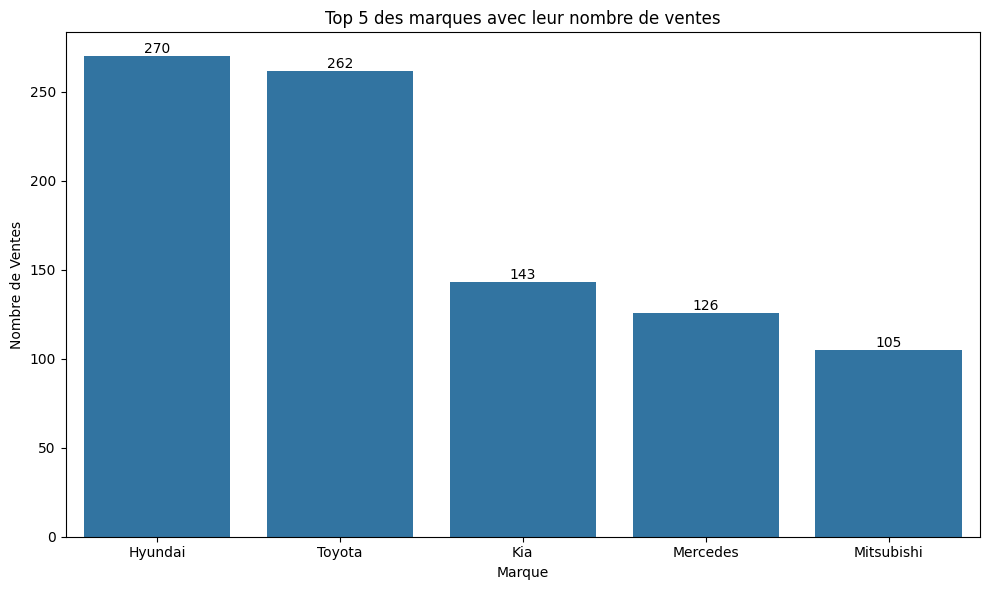

In [94]:
# Création du graphique à barres
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_5_marques.index, y=top_5_marques.values)
plt.xlabel('Marque')
plt.ylabel('Nombre de Ventes')
plt.title('Top 5 des marques')


# Ajouter le nombre au-dessus de chaque barre
for bar in bars.containers:
    plt.bar_label(bar, label_type='edge')


# Ajuster les marges et afficher le graphique
plt.tight_layout()
plt.show()

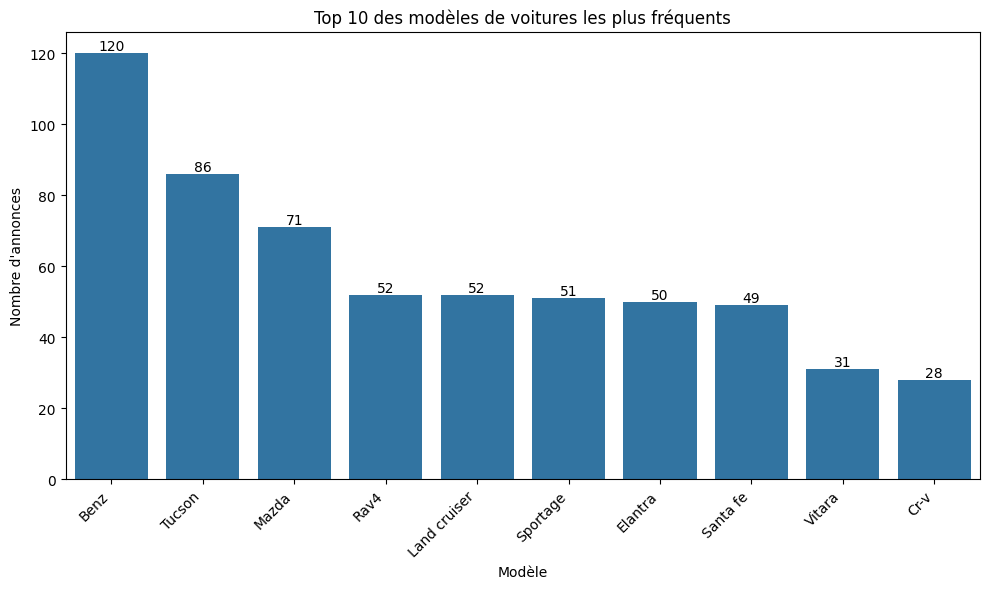

In [98]:
# nombre de chaque modèle et affichage des 10 plus fréquents
top_10_modeles = df_final['modele'].value_counts().head(10)

# Visualisation
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_10_modeles.index, y=top_10_modeles.values)
plt.xlabel('Modèles')
plt.ylabel('Nombre d\'apparution')
plt.title('Top 10 des modèles de voitures les plus fréquents')
plt.xticks(rotation=45, ha='right')

#nombre au-dessus de chaque barre
for bar in bars.containers:
    plt.bar_label(bar, label_type='edge')


plt.tight_layout()
plt.show()

la Mercedess Benz en tête d'actulaité suivie de la Tucson et Mazda

In [106]:
#inclure seulement les 5 marques les plus fréquentes
df_top_5 = df_final[df_final['marque'].isin(top_5_marques)]

#tableau croisé dynamique pour les 3 modèles les plus fréquents
pivot_table = df_top_5.groupby(['marque', 'modele'])['modele'].count().unstack(fill_value=0)

#nlargest par ligne
pivot_table = pivot_table.apply(lambda x: x.nlargest(3), axis=1)
pivot_table = pivot_table.stack().reset_index(name='count')

print("Tableau croisé dynamique des 3 modèles les plus fréquents par marque:\n")
pivot_table

Tableau croisé dynamique des 3 modèles les plus fréquents par marque:



,marque,modele,count
0,Hyundai,Elantra,50.0
1,Hyundai,Santa fe,49.0
2,Hyundai,Tucson,86.0
3,Kia,Optima,15.0
4,Kia,Sorento,21.0
5,Kia,Sportage,51.0
6,Mercedes,Benz,120.0
7,Mercedes,C 280 4 matic,1.0
8,Mercedes,C200,1.0
9,Mitsubishi,Eclipse,16.0


In [109]:
#statistiques descriptives
prix_stats = df_vente['prix_vente'].agg(['mean', 'median', 'max', 'min'])

#résultats
print("Statistiques des prix de vente des voitures:\n")
print(f"Prix moyen : {prix_stats['mean']:.2f}")
print(f"Prix médian : {prix_stats['median']:.2f}")
print(f"Prix maximum : {prix_stats['max']}")
print(f"Prix minimum : {prix_stats['min']}")

Statistiques des prix de vente des voitures:

Prix moyen : 10010592.59
Prix médian : 7950000.00
Prix maximum : 50000000.0
Prix minimum : 1000000.0


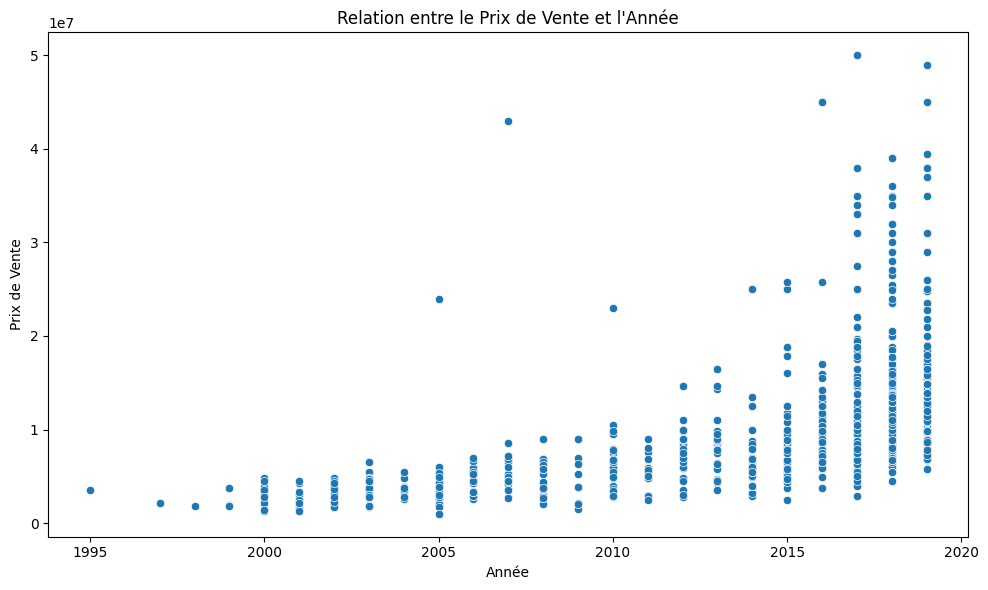

In [113]:
# Convertir la colonne 'annee' en numériques
df_vente['annee'] = pd.to_numeric(df_vente['annee'], errors='coerce')

# Supprimer les valeurs manquantes (NaN) dans la colonne 'annee'
df_vente.dropna(subset=['annee'], inplace=True)

#Convertir annee en entier
df_vente['annee'] = df_vente['annee'].astype(int)


# Afficher le nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annee', y='prix_vente', data=df_vente)
plt.title('Relation entre le Prix de Vente et l\'Année')
plt.xlabel('Année')
plt.ylabel('Prix de Vente')
plt.tight_layout()
plt.show()

Plus l'année de la voiture est recénte, plus le prix est considérable

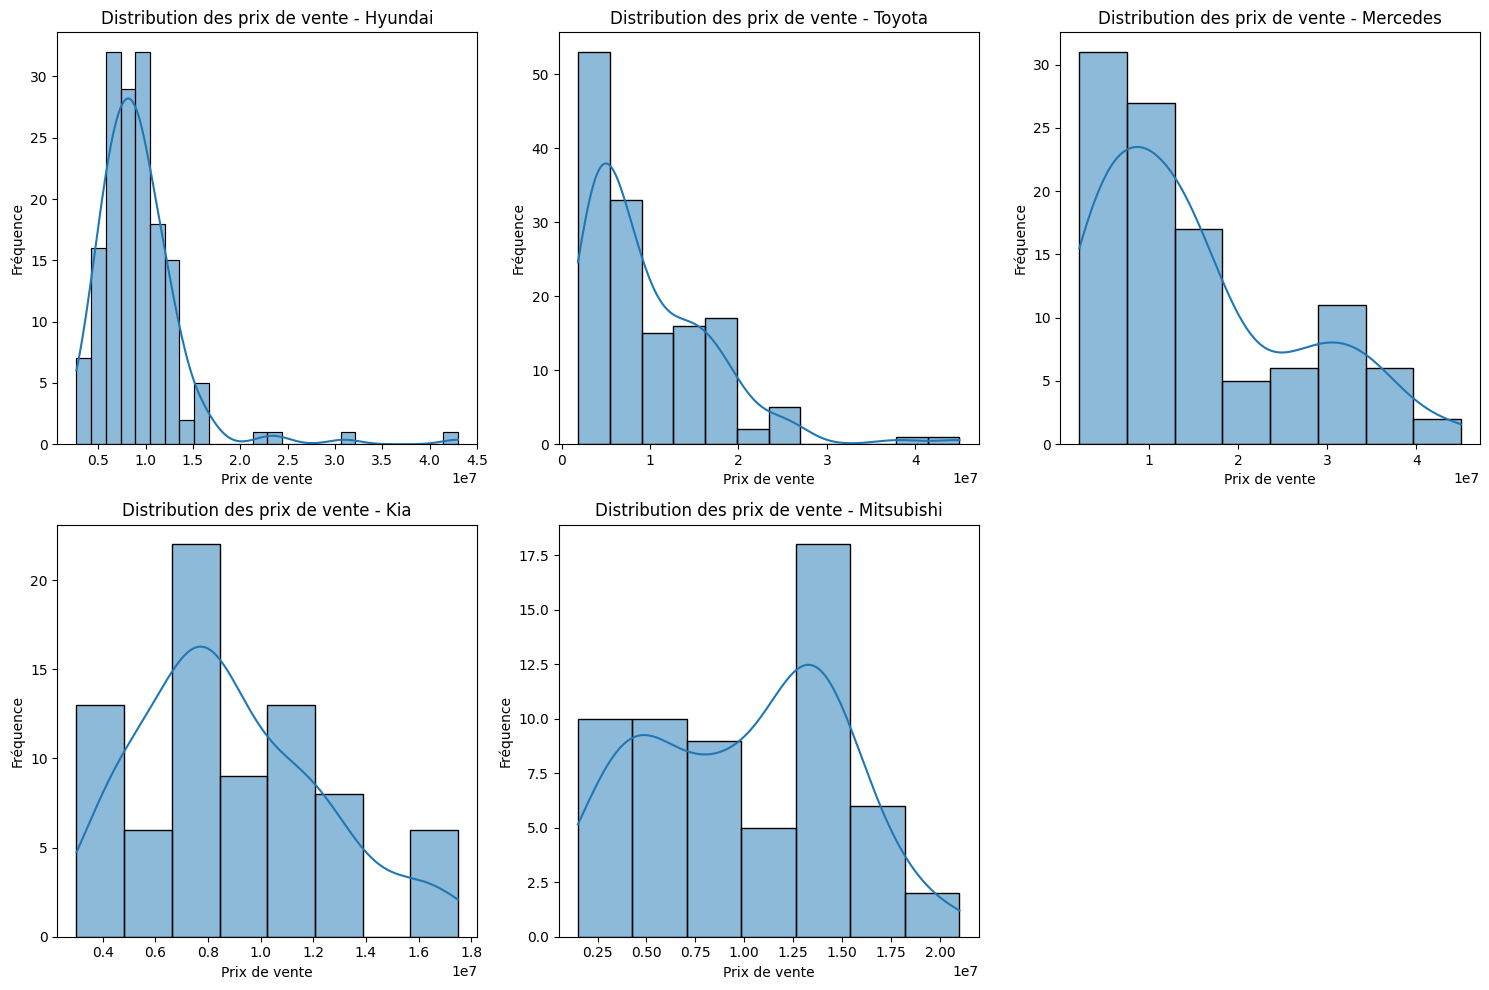

In [108]:
# Calculer les 5 marques les plus fréquentes
top_5_marques = df_vente['marque'].value_counts().head(5).index.tolist()

# Filtrer le DataFrame pour inclure seulement les 5 marques les plus fréquentes
df_top_5 = df_vente[df_vente['marque'].isin(top_5_marques)]

# histogrammes pour chaque marque
plt.figure(figsize=(15, 10))
for i, marque in enumerate(top_5_marques, 1):
    plt.subplot(2, 3, i)  # Créer une grille de 2x3 pour afficher les histogrammes
    sns.histplot(df_top_5[df_top_5['marque'] == marque]['prix_vente'], kde=True)
    plt.title(f'Distribution des prix de vente - {marque}')
    plt.xlabel('Prix de vente')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

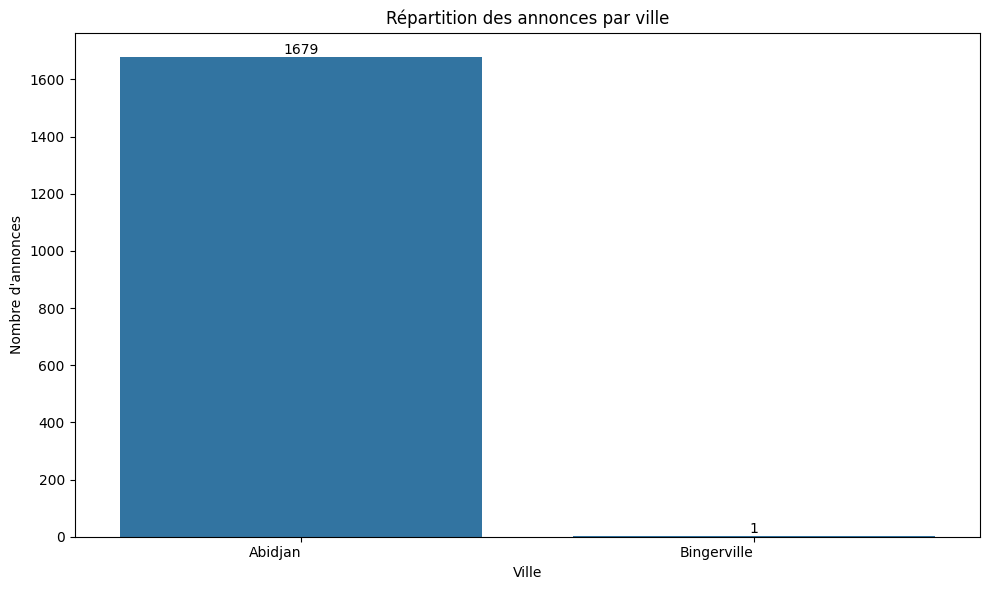

In [95]:
# Calcul du nombre d'annonces par ville
ville_counts = df_final['ville'].value_counts()

# Création du graphique à barres
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=ville_counts.index, y=ville_counts.values)

# Ajout de titres et labels
plt.title('Répartition des annonces par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre d\'annonces')
plt.xticks(ha='right')

# Ajouter le nombre au-dessus de chaque barre
for bar in bars.containers:
    plt.bar_label(bar, label_type='edge')

# Ajuster les marges et afficher le graphique
plt.tight_layout()
plt.show()

pratiqument toutes les annonces sont situées à Abidjan



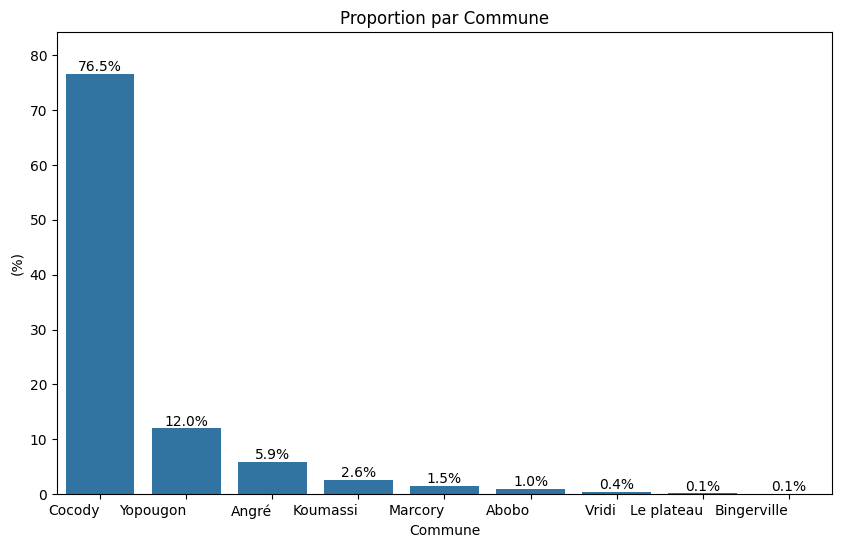

In [92]:
#nombre pour chaque commune
commune_counts = df_final['commune'].value_counts(normalize=True) * 100

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=commune_counts.index, y=commune_counts.values)

# label et titre
plt.xlabel("Commune")
plt.ylabel("(%)")
plt.title("Proportion par Commune")

#valeur en nombre opur chaque barre
for i, v in enumerate(commune_counts.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.xticks(ha='right')

plt.ylim(0, commune_counts.max() * 1.1)  #espace entre le la fig et le cadre
plt.show()

la majeur partie des annonces est située à Cocody

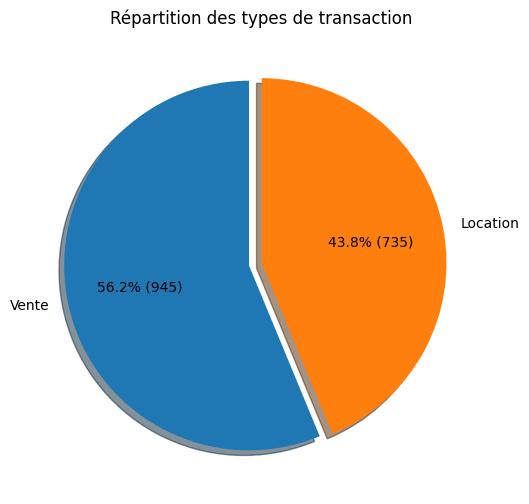

In [93]:
# nombre pour chaque type de transaction
transaction_counts = df_final['type_transaction'].value_counts()

# pie chart
explode = (0.07, 0.0)
plt.figure(figsize=(6, 6))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(transaction_counts) / 100)})', shadow=True, startangle=90, explode=explode)
plt.title('Répartition des types de transaction')

plt.show()

On observe une prédominance du marché de vente à 56% sans oublier le marché de location quia aussi une part significative de 44%

# **RESUME**

l'année de la voiture est d'un point crucial pour le prix.

#### Distriutionn des prix de vente des 5 meilleures marques

**Statistiques des prix de vente :**

- **Prix moyen :** 10010592.59
- **Prix médian :** 7950000.00
- **Prix maximum :** 50000000.0
- **Prix minimum :** 1000000.0

**Distribution des prix de vente - Hyundai:**

La plupart des voitures Hyundai ont un prix de vente autour de 10 millions d'unités (soit 10^7), avec un pic visible à cette valeur. Il y a quelques voitures avec des prix plus élevés, jusqu'à environ 45 millions d'unités.

**Distribution des prix de vente - Toyota:**

Les voitures Toyota montrent une concentration de ventes pour des prix inférieurs à 10 millions d'unités, avec un pic significatif. Quelques voitures ont des prix plus élevés, jusqu'à environ 40 millions d'unités.

**Distribution des prix de vente - Mercedes:**

Les voitures Mercedes présentent une gamme de prix plus large, avec un pic visible autour de 10 millions d'unités et un nombre notable de voitures vendues pour 20 à 30 millions d'unités. Il y a également quelques valeurs extrêmes jusqu'à 40 millions d'unités.

**Distribution des prix de vente - Kia:**

Les voitures Kia sont principalement vendues pour des prix entre 4 et 12 millions d'unités, avec un pic autour de 6 millions d'unités. Moins de voitures sont vendues pour des prix plus élevés, jusqu'à environ 18 millions d'unités.

**Distribution des prix de vente - Mitsubishi:**

Les voitures Mitsubishi montrent un pic de prix de vente autour de 12.5 millions d'unités, avec la plupart des ventes entre 2.5 et 17.5 millions d'unités. Moins de voitures sont vendues pour des prix plus élevés, jusqu'à environ 20 millions d'unités.

#### Marques et modèles

La **Hyundai** prend la tête des marques les plus présentes dans les annonces, suivie de la **Toyota** qui prend la 2e place, sans oublier **Kia, Mercedess et Mitsubishi.**

- **Mercedess** ne fait que 126 apparitions, cependant, elle compte 120 annonces avec la **Mercedess benz.**

- **Hyundai** est assez extravertis en terme d'annonce, avec en tête la **Tucson**, suivie de la **Santafe** et **Elentra** qui ont les même proportions  qui représente environs 70% des annonces.

- **Kia** est dominée par la **Sportage**, suivie de la **Sorento** et **Optima**  qui représentent plus de 55% des annonces.

- **Mitsubishi** est assez équilibré avec les modèles **Eclipse, Pajero et Outlander** qui représentent quasi 50% des annonces.

- **Toyota** domminée par les modèles **Land cruiser, Corolla,	Rav4** qui représente 50% des annonces.



#### Type de transaction

- **Prédominance de la vente :** Le fait que **56%** des annonces soient des ventes indique qu'il y a une préférence pour la vente par rapport à la vente. Cela pourrait refléter une tendance du marché, des préférences locales.

- **Marché actif de la location :** Malgré la prédominance des ventes, les ventes représentent une part significative (**44 %**) des annonces, ce qui indique qu'il existe également un marché actif pour la location de véhicules.

#### Localisation

- Pratiquement toutes les annonces sont situées dans la ville d'**Abidjan**. Associé au pourcentage de location et de vente, nous pouvons dire qu'il n'y a pas de différence significative pour les annonces.

- Plus de **75%** des annonces sont à Cocody, suivi de Yopougon et Angré qui regroupent respectivement **12%** et **6%**